In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('titanic.csv')
df.shape

(891, 15)

In [33]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
112,0,3,male,22.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
297,0,1,female,2.0,1,2,151.550,S,First,child,False,C,Southampton,no,False
427,1,2,female,19.0,0,0,26.000,S,Second,woman,False,NaN,Southampton,yes,True
392,0,3,male,28.0,2,0,7.925,S,Third,man,True,NaN,Southampton,no,False
565,0,3,male,24.0,2,0,24.150,S,Third,man,True,NaN,Southampton,no,False


# EDA

In [46]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
survived_mean = df.survived.mean()
survived_mean

0.3838383838383838

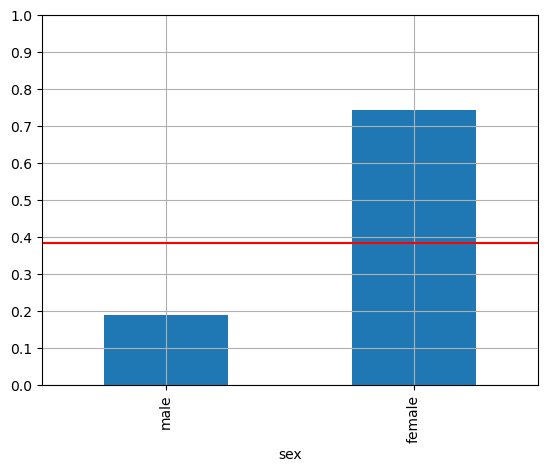

In [35]:
df.groupby('sex').survived.mean().sort_values().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

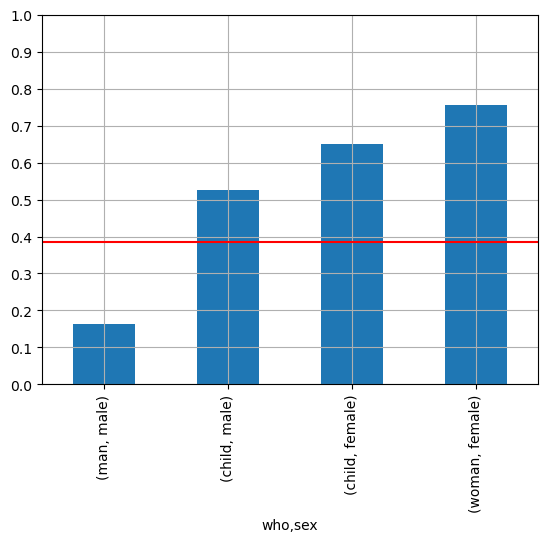

In [37]:
df.groupby(['who', 'sex']).survived.mean().sort_values().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

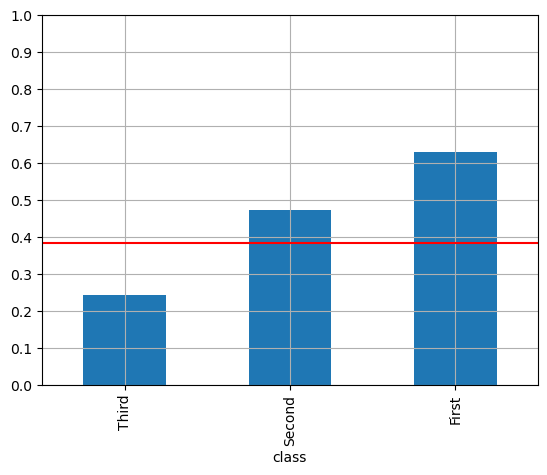

In [38]:
df.groupby('class').survived.mean().sort_values().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

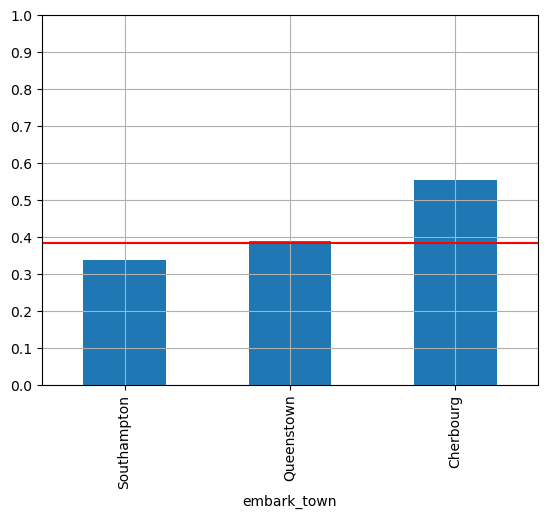

In [42]:
df.groupby('embark_town').survived.mean().sort_values().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

In [40]:
pd.qcut(df.age, 5)

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

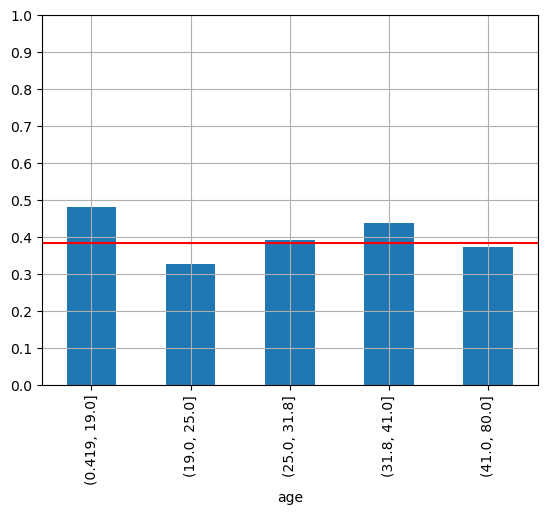

In [45]:
df.loc[df.age.notnull()].groupby(pd.qcut(df.age, 5)).survived.mean().sort_index().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

In [60]:
df.groupby(df.deck.notnull()).survived.agg(['count', 'mean'])

,count,mean
deck,,
False,688,0.299419
True,203,0.669951


In [61]:
df.groupby('deck').survived.agg(['count', 'mean']).sort_index()

,count,mean
deck,,
A,15,0.466667
B,47,0.744681
C,59,0.593220
D,33,0.757576
E,32,0.750000
F,13,0.615385
G,4,0.500000


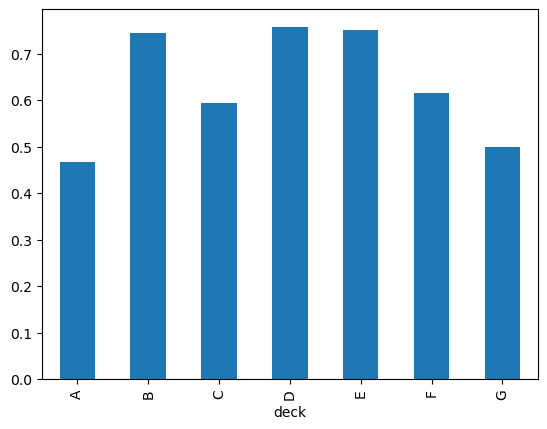

In [62]:
df.groupby('deck').survived.mean().sort_index().plot.bar();

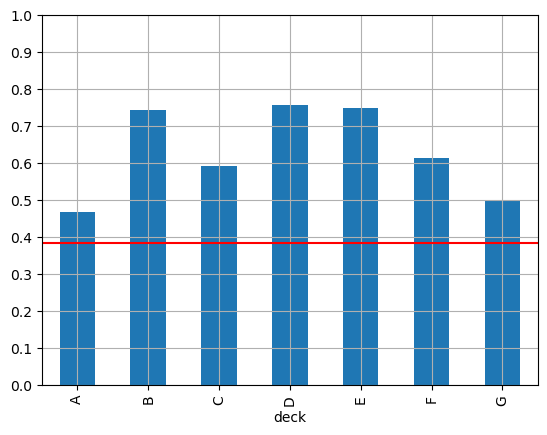

In [63]:
df.loc[df.deck.notnull()].groupby('deck').survived.mean().sort_index().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

In [69]:
n_relatives = df.sibsp + df.parch
n_relatives.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

In [70]:
df.groupby(n_relatives).survived.agg(['count', 'mean']).sort_index()

,count,mean
0,537,0.303538
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


In [73]:
df.groupby(['class', n_relatives]).survived.count()

class     
First   0     109
        1      70
        2      24
        3       7
        4       2
        5       4
Second  0     104
        1      34
        2      31
        3      13
        4       1
        5       1
Third   0     324
        1      57
        2      47
        3       9
        4      12
        5      17
        6      12
        7       6
        10      7
Name: survived, dtype: int64

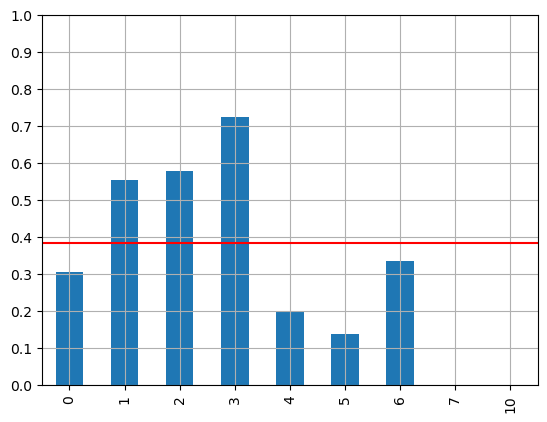

In [71]:
df.groupby(n_relatives).survived.mean().sort_index().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

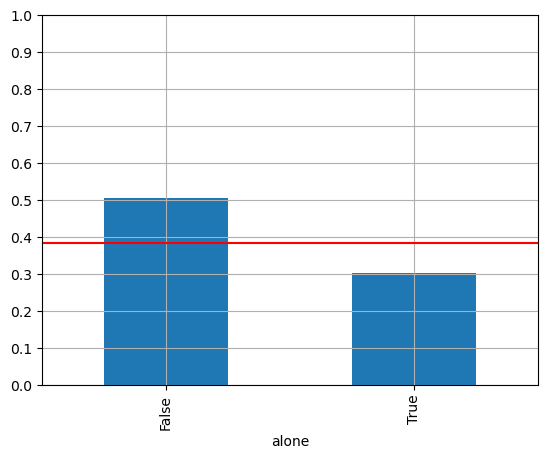

In [74]:
df.groupby('alone').survived.mean().sort_index().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

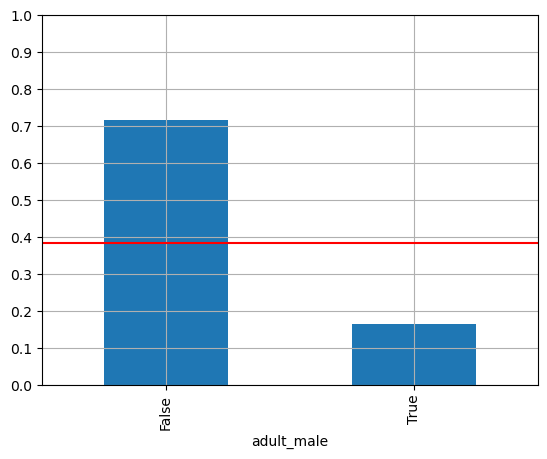

In [89]:
df.groupby('adult_male').survived.mean().sort_index().plot.bar(ylim=(0, 1));
plt.axhline(survived_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.grid()

# Model

In [75]:
features = ['class', 'age', 'sibsp', 'parch', 'adult_male', 'alone']
features = ['class', 'adult_male']

In [76]:
df[features].isnull().sum()

class         0
adult_male    0
dtype: int64

In [77]:
df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [78]:
df.groupby(['who', 'class']).age.agg(lambda s: s.isnull().sum())

who    class 
child  First      0
       Second     0
       Third      0
man    First     21
       Second     9
       Third     94
woman  First      9
       Second     2
       Third     42
Name: age, dtype: int64

In [79]:
df.groupby(['sex', 'class']).age.describe()

count       mean        std   min     25%   50%    75%   max
sex    class                                                               
female First    85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       Second   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       Third   102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   First   101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       Second   99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       Third   253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [80]:
df.age = df.groupby(['sex', 'class']).age.transform(lambda s: s.mean())

In [82]:
X_aux = df[features].copy()
y = df.survived

In [83]:
X_aux.shape, y.shape

((891, 2), (891,))

In [84]:
X = pd.get_dummies(X_aux, columns=['class'])
# X['is_female'] = X.sex.eq('female')
# X = X.drop('sex', axis=1)
X.head(3)

,adult_male,class_First,class_Second,class_Third
0,True,0,0,1
1,False,1,0,0
2,False,0,0,1


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 4), (712,), (179, 4), (179,))

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
coeff_series = pd.Series(model.coef_[0], index=X_train.columns).sort_values()
coeff_series

adult_male     -2.669354
class_Third    -0.946326
class_Second    0.054442
class_First     0.891966
dtype: float64

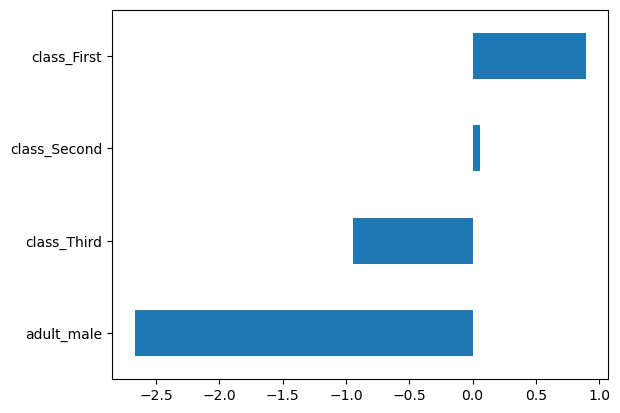

In [94]:
coeff_series.plot.barh();

In [95]:
y_test_pred = model.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_test_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_test_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.69      0.75      0.72        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Precission: 0.6933333333333334
Recall: 0.7536231884057971
F1-score: 0.7222222222222223


## Seleccionar usando gridsearchcv

In [124]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
n_relatives      0
dtype: int64

In [147]:
df['n_relatives'] = df.sibsp + df.parch

features = ['class', 'age',  'n_relatives', 'adult_male']

X_aux = df[features].copy()
y = df.survived

X = pd.get_dummies(X_aux, columns=['class'])
X.head(3)

,age,n_relatives,adult_male,class_First,class_Second,class_Third
0,26.507589,1,True,0,0,1
1,34.611765,1,False,1,0,0
2,21.750000,0,False,0,0,1


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 6), (712,), (179, 6), (179,))

In [158]:
from sklearn.model_selection import GridSearchCV

C_vec = [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10]
param_grid = {"C": C_vec}

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                           param_grid=param_grid,
                           scoring='f1',
                           n_jobs=6,
                           refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=6,
             param_grid={'C': [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10]},
             scoring='f1')

In [160]:
grid_search.best_params_

{'C': 1}

In [161]:
grid_search.best_score_

0.7611425469619979

In [162]:
grid_search.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [163]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_test_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_test_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Precission: 0.78125
Recall: 0.7246376811594203
F1-score: 0.7518796992481203


In [164]:
coeff_series = pd.Series(grid_search.best_estimator_.coef_[0], index=X_train.columns).sort_values()
coeff_series

adult_male     -3.359521
class_Third    -0.521137
n_relatives    -0.348817
age             0.055349
class_Second    0.067567
class_First     0.470129
dtype: float64

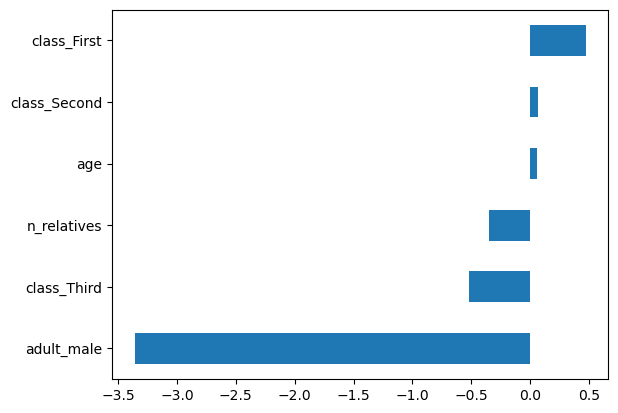

In [166]:
coeff_series.plot.barh();

In [169]:
import pickle

with open('my_production_model', mode='wb') as file:
    pickle.dump(grid_search.best_estimator_, file)
    
with open('my_production_model', mode='rb') as file:
    loaded_model = pickle.load(file)

In [171]:
loaded_model

LogisticRegression(C=1, max_iter=1000)

## Árbol de decisión

In [174]:
X_train.shape

(712, 6)

In [173]:
2 ** 8

256

In [175]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_leaf_nodes": [2 ** 4, 2 ** 6, 2 ** 8],
    "min_samples_leaf": [10, 20, 30]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='f1',
                           n_jobs=6,
                           refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid={'max_leaf_nodes': [16, 64, 256],
                         'min_samples_leaf': [10, 20, 30]},
             scoring='f1')

In [176]:
grid_search.best_params_

{'max_leaf_nodes': 16, 'min_samples_leaf': 10}

In [177]:
grid_search.best_score_

0.7645535997256886

In [178]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_test_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_test_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Precission: 0.7878787878787878
Recall: 0.7536231884057971
F1-score: 0.7703703703703704


In [179]:
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

In [180]:
THRESHOLD = 0.5

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.7878787878787878
Recall: 0.7536231884057971
F1-score: 0.7703703703703704


In [181]:
THRESHOLD = 0.7

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.9743589743589743
Recall: 0.5507246376811594
F1-score: 0.7037037037037037


In [182]:
THRESHOLD = 0.3

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.6923076923076923
Recall: 0.9130434782608695
F1-score: 0.7875


In [207]:
THRESHOLD = 0.0

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.40350877192982454
Recall: 1.0
F1-score: 0.575


In [208]:
THRESHOLD = 1.0

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.0
Recall: 0.0
F1-score: 0.0


/home/infinitemonkeys/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seleccionamos el umbral que optimiza f1

In [190]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_f1_score_list = []

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = f1_score(y_true=y_test, y_pred=pred)
    test_f1_score_list.append(metric)

In [195]:
threshold_list

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [191]:
test_f1_score_list

[0.5787234042553191,
 0.5938864628820961,
 0.7804878048780488,
 0.7777777777777777,
 0.7875,
 0.7875,
 0.786206896551724,
 0.7703703703703704,
 0.7703703703703704,
 0.7703703703703704,
 0.7703703703703704,
 0.7107438016528926,
 0.7107438016528926,
 0.7037037037037037,
 0.7037037037037037,
 0.6915887850467289,
 0.6915887850467289,
 0.5567010309278351,
 0.5567010309278351]

In [200]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

smoothed_test_f1_score_arr = moving_average(test_f1_score_list, 3)
smoothed_test_f1_score_arr

In [202]:
np.argmax(test_f1_score_list)

4

In [203]:
threshold_list[np.argmax(test_f1_score_list)]

0.25

In [206]:
optimal_threshold = threshold_list[np.argmax(smoothed_test_f1_score_arr)]
optimal_threshold

0.30000000000000004

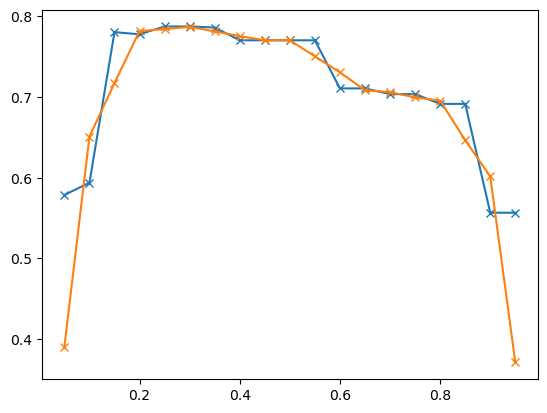

In [204]:
plt.plot(threshold_list, test_f1_score_list, 'x-');
plt.plot(threshold_list, smoothed_test_f1_score_arr, 'x-');

**Buscar qué umbral mínimo tiene una precission de más del 80 %**

In [209]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_precission_score_list = []

NEEDED_METRIC = 0.8

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = precision_score(y_true=y_test, y_pred=pred)
    test_precission_score_list.append(metric)
    if metric >= NEEDED_METRIC:
        break
threshold, metric

(0.6000000000000001, 0.8269230769230769)

**Buscar qué umbral máximo tiene un recall de más del 60 %**

In [212]:
threshold_list = np.linspace(0, 1, 21)[1:-1][::-1]
test_precission_score_list = []

NEEDED_METRIC = 0.6

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = recall_score(y_true=y_test, y_pred=pred)
    test_precission_score_list.append(metric)
    if metric >= NEEDED_METRIC:
        break
threshold, metric

(0.65, 0.6231884057971014)

# Resumen proceso de aprendizaje automático supervisado

1. EDA
2. Ingeniería de atributos
3. EDA
4. Selección atributos para el modelo que tengan sentido
5. GridSearchCV con varios modelos (regresión logística y árbol de decisión)
6. Elegir el que tiene mejor best_core_ en el proceso anterior.
7. Calcular la métrica de error en test
8. Seleccionar un umbral operativo para mi toma de decisión usando el modelo, basándonos en:
    - Maximización de F1
    - Búsqueda del umbral mínimo que permite una precission mínima requerida
    - Búsqueda del umbral máximo que permite un recall mínimo requerido
9. Guardar el modelo
10. Buscar activaciones útiles basadas en una aplicación que integrase el modelo


NOTAS:
- El paso 4 y 5 se puede realizar múltiples ocasiones
- El paso 10, ya tenías una noción antes de comenzar todo el proceso, si no, ¿ para qué estás haciendo el modelo?

Modelos vistos:

- Regresión:
    - Ridge
    - DecisionTreeRegressor
- Clasificación:
    - LogisticRegression
    - DecisionTreeClassifier